In [1]:
import pandas as pd
import numpy as np
import os
#import alphien
from sklearn.externals import joblib
import time

/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
def FeatureGen_SingleAsset_OneVar(df, Asset):
    """
    :param Asset: 'Undl0', 'Undl1', 'Undl2'
    :param df: original df of 50 Xs for Asset
    """
    import pandas as pd
    
    newdf=pd.DataFrame()
    
    Vols=[Asset+'volatm_6M',Asset+'volatm_1Y',Asset+'volatm_1Y6M',Asset+'volatm_2Y',Asset+'volatm_2Y6M',
          Asset+'volatm_3Y',Asset+'volatm_3Y6M',Asset+'volatm_4Y',Asset+'volatm_5Y',Asset+'volatm_6Y']
    
    Skews95_105=[Asset+'skew95.105_6M',Asset+'skew95.105_1Y',Asset+'skew95.105_1Y6M',
                 Asset+'skew95.105_2Y',Asset+'skew95.105_2Y6M',Asset+'skew95.105_3Y',
                 Asset+'skew95.105_3Y6M',Asset+'skew95.105_4Y',Asset+'skew95.105_5Y',
                 Asset+'skew95.105_6Y']
    
    Skews70_130=[Asset+'skew70.130_6M',Asset+'skew70.130_1Y',Asset+'skew70.130_1Y6M',
                 Asset+'skew70.130_2Y',Asset+'skew70.130_2Y6M',Asset+'skew70.130_3Y',
                 Asset+'skew70.130_3Y6M',Asset+'skew70.130_4Y',Asset+'skew70.130_5Y',
                 Asset+'skew70.130_6Y']
    
    Curves95_105=[Asset+'curve95.105_6M',Asset+'curve95.105_1Y',Asset+'curve95.105_1Y6M',
                 Asset+'curve95.105_2Y',Asset+'curve95.105_2Y6M',Asset+'curve95.105_3Y',
                 Asset+'curve95.105_3Y6M',Asset+'curve95.105_4Y',Asset+'curve95.105_5Y',
                 Asset+'curve95.105_6Y']
    
    Curves70_130=[Asset+'curve70.130_6M',Asset+'curve70.130_1Y',Asset+'curve70.130_1Y6M',
                 Asset+'curve70.130_2Y',Asset+'curve70.130_2Y6M',Asset+'curve70.130_3Y',
                 Asset+'curve70.130_3Y6M',Asset+'curve70.130_4Y',Asset+'curve70.130_5Y',
                 Asset+'curve70.130_6Y']
    
    newdf[Asset+'volatm_mean']=df[Vols].mean(axis=1)
    newdf[Asset+'volatm_max']=df[Vols].max(axis=1)
    newdf[Asset+'volatm_min']=df[Vols].min(axis=1)
    
    newdf[Asset+'skew95.105_mean']=df[Skews95_105].mean(axis=1)
    newdf[Asset+'skew95.105_max']=df[Skews95_105].max(axis=1)
    newdf[Asset+'skew95.105_min']=df[Skews95_105].min(axis=1)
    
    newdf[Asset+'skew70.130_mean']=df[Skews70_130].mean(axis=1)
    newdf[Asset+'skew70.130_max']=df[Skews70_130].max(axis=1)
    newdf[Asset+'skew70.130_min']=df[Skews70_130].min(axis=1)
    
    newdf[Asset+'curve95.105_mean']=df[Curves95_105].mean(axis=1)
    newdf[Asset+'curve95.105_max']=df[Curves95_105].max(axis=1)
    newdf[Asset+'curve95.105_min']=df[Curves95_105].min(axis=1)
    
    newdf[Asset+'curve70.130_mean']=df[Curves70_130].mean(axis=1)
    newdf[Asset+'curve70.130_max']=df[Curves70_130].max(axis=1)
    newdf[Asset+'curve70.130_min']=df[Curves70_130].min(axis=1)
    
    return newdf

In [3]:
def FeatureGen_SingleAsset_TwoVar(df, Asset):
    """
    :param Asset: 'Undl0', 'Undl1', 'Undl2'
    :param df: original df of 50 Xs for Asset
    """
    import pandas as pd
    
    newdf=pd.DataFrame()
    
    newdf[Asset+'centMom3.95.105_6M']=df[Asset+'volatm_6M']*df[Asset+'skew95.105_6M']
    newdf[Asset+'centMom3.95.105_1Y']=df[Asset+'volatm_1Y']*df[Asset+'skew95.105_1Y']
    newdf[Asset+'centMom3.95.105_1Y6M']=df[Asset+'volatm_1Y6M']*df[Asset+'skew95.105_1Y6M']
    newdf[Asset+'centMom3.95.105_2Y']=df[Asset+'volatm_2Y']*df[Asset+'skew95.105_2Y']
    newdf[Asset+'centMom3.95.105_2Y6M']=df[Asset+'volatm_2Y6M']*df[Asset+'skew95.105_2Y6M']
    newdf[Asset+'centMom3.95.105_3Y']=df[Asset+'volatm_3Y']*df[Asset+'skew95.105_3Y']
    newdf[Asset+'centMom3.95.105_3Y6M']=df[Asset+'volatm_3Y6M']*df[Asset+'skew95.105_3Y6M']
    newdf[Asset+'centMom3.95.105_4Y']=df[Asset+'volatm_4Y']*df[Asset+'skew95.105_4Y']
    newdf[Asset+'centMom3.95.105_5Y']=df[Asset+'volatm_5Y']*df[Asset+'skew95.105_5Y']
    newdf[Asset+'centMom3.95.105_6Y']=df[Asset+'volatm_6Y']*df[Asset+'skew95.105_6Y']
    
    newdf[Asset+'centMom3.70.130_6M']=df[Asset+'volatm_6M']*df[Asset+'skew70.130_6M']
    newdf[Asset+'centMom3.70.130_1Y']=df[Asset+'volatm_1Y']*df[Asset+'skew70.130_1Y']
    newdf[Asset+'centMom3.70.130_1Y6M']=df[Asset+'volatm_1Y6M']*df[Asset+'skew70.130_1Y6M']
    newdf[Asset+'centMom3.70.130_2Y']=df[Asset+'volatm_2Y']*df[Asset+'skew70.130_2Y']
    newdf[Asset+'centMom3.70.130_2Y6M']=df[Asset+'volatm_2Y6M']*df[Asset+'skew70.130_2Y6M']
    newdf[Asset+'centMom3.70.130_3Y']=df[Asset+'volatm_3Y']*df[Asset+'skew70.130_3Y']
    newdf[Asset+'centMom3.70.130_3Y6M']=df[Asset+'volatm_3Y6M']*df[Asset+'skew70.130_3Y6M']
    newdf[Asset+'centMom3.70.130_4Y']=df[Asset+'volatm_4Y']*df[Asset+'skew70.130_4Y']
    newdf[Asset+'centMom3.70.130_5Y']=df[Asset+'volatm_5Y']*df[Asset+'skew70.130_5Y']
    newdf[Asset+'centMom3.70.130_6Y']=df[Asset+'volatm_6Y']*df[Asset+'skew70.130_6Y']
    
    newdf[Asset+'centMom3.95.105_mean']=newdf.iloc[:,:10].mean(axis=1)
    newdf[Asset+'centMom3.95.105_max']=newdf.iloc[:,:10].max(axis=1)
    newdf[Asset+'centMom3.95.105_min']=newdf.iloc[:,:10].min(axis=1)
    
    newdf[Asset+'centMom3.70.130_mean']=newdf.iloc[:,10:20].mean(axis=1)
    newdf[Asset+'centMom3.70.130_max']=newdf.iloc[:,10:20].max(axis=1)
    newdf[Asset+'centMom3.70.130_min']=newdf.iloc[:,10:20].min(axis=1)
    
    return newdf

In [4]:
def FeatureGen_MultiAssets(df):
    """
    :param df: df of 150 Xs
    """
    
    import pandas as pd
    
    newdf=pd.DataFrame()
    cols=df.columns[:50]
    
    for i in range(50):
        newdf['All_'+cols[i][5:]+'_mean']=df.iloc[:,[i,i+50,i+100]].mean(axis=1)
        newdf['All_'+cols[i][5:]+'_max']=df.iloc[:,[i,i+50,i+100]].max(axis=1)
        newdf['All_'+cols[i][5:]+'_min']=df.iloc[:,[i,i+50,i+100]].min(axis=1)
    
    return newdf

In [5]:
def FeatureGen_Square(df):
    """
    :param df: df of orginal 159 Xs 
    """
    newdf=df**2
    newdf.columns=list(map(lambda x: x+'_square',df.columns))
    
    return newdf

In [6]:
def FeatureGeneration(df):
    """
    :param df: df of a mini-batch dataset
    """
    import pandas as pd
    
    Xs=df.iloc[:,:150]
    Assets=['Undl0','Undl1','Undl2']
    
    for i, asset in enumerate(Assets):
        newdf1=FeatureGen_SingleAsset_OneVar(Xs.iloc[:,(i*50):((i+1)*50)],asset)
        newdf2=FeatureGen_SingleAsset_TwoVar(Xs.iloc[:,(i*50):((i+1)*50)],asset)
        Xs=pd.concat([Xs,newdf1,newdf2], axis=1)
    
    newdf=FeatureGen_MultiAssets(Xs.iloc[:,:150])
    Xs=pd.concat([Xs,newdf], axis=1)
    
    newdf=FeatureGen_Square(df.iloc[:,:159])
    Xs=pd.concat([Xs,newdf,df.iloc[:,-15:]],axis=1)
    
    return Xs

In [7]:
readPath='/home/jguo81/FordhamA/JiaGuo/Data/1007'
writePath='/home/jguo81/FordhamA/JiaGuo/Data/feature_test_1007'

os.chdir(readPath)
files=os.listdir()

#dl=alphien.data.DataLoader()

In [8]:
start1=time.time()

for file in files:
    start2=time.time()
    os.chdir(readPath)
    df=joblib.load(file)
    df=df.astype(np.float16)
    df['ContractFeature_Schedule,EndDate_ENCODED']=df['ContractFeature_Schedule,EndDate_ENCODED']\
                                                        .astype(np.int).astype(str).astype('category')
    
    df=FeatureGeneration(df)
    
    os.chdir(writePath)
    joblib.dump(df,file)
    end2=time.time()
    print(file, 'time cost:', end2-start2)
    

end1=time.time()

print('time cost:', end1-start1)

microBatch_0.joblib time cost: 4.085302829742432
microBatch_22.joblib time cost: 5.391624927520752
microBatch_2.joblib time cost: 4.369059324264526
microBatch_15.joblib time cost: 5.029303550720215
microBatch_12.joblib time cost: 4.605731010437012
microBatch_26.joblib time cost: 3.9385902881622314
microBatch_14.joblib time cost: 4.260924577713013
microBatch_25.joblib time cost: 4.18183970451355
microBatch_23.joblib time cost: 5.568631649017334
microBatch_13.joblib time cost: 4.480104684829712
microBatch_18.joblib time cost: 4.48285984992981
microBatch_10.joblib time cost: 4.645840406417847
microBatch_21.joblib time cost: 4.6600587368011475
microBatch_11.joblib time cost: 4.158809423446655
microBatch_24.joblib time cost: 5.126922607421875
microBatch_17.joblib time cost: 7.695146322250366
microBatch_19.joblib time cost: 9.664425134658813
microBatch_20.joblib time cost: 8.610505819320679
microBatch_1.joblib time cost: 6.706686496734619
microBatch_16.joblib time cost: 9.354914903640747
tim

In [14]:
data = joblib.load("/home/jguo81/FordhamA/JiaGuo/Data/feature_test_1007/microBatch_0.joblib")
data

,Undl0volatm_6M,Undl0skew95.105_6M,Undl0curve95.105_6M,Undl0skew70.130_6M,Undl0curve70.130_6M,Undl0volatm_1Y,Undl0skew95.105_1Y,Undl0curve95.105_1Y,Undl0skew70.130_1Y,Undl0curve70.130_1Y,...,Undl2svc,Undl0mr,Undl1mr,Undl2mr,"ContractFeature_Autocall,BarrierLevel,LevelInitial","ContractFeature_ExpiryPayment,BarrierLevel","ContractFeature_ExpiryPayment,KickInPaymentGearing_ENCODED","ContractFeature_Schedule,EndDate_ENCODED","ContractFeature_Schedule,PeriodFrequency_ENCODED",val_lvsvcharge
8462802,0.222412,-0.645508,0.393066,-0.526855,0.166626,0.195679,-0.291260,0.158325,-0.266602,0.101379,...,-0.540039,3.960938,3.824219,3.660156,1.000000,0.500000,1.0,5,12.0,0.012222
8039783,0.267822,-0.657227,0.081177,-0.536621,-0.043030,0.235474,-0.295166,0.058929,-0.262939,0.021149,...,-0.540039,3.960938,3.824219,3.660156,1.200195,0.750000,2.0,4,12.0,-0.001842
8139999,0.296631,-0.313965,-0.194092,-0.242554,-0.156494,0.283203,-0.144287,-0.038177,-0.125977,-0.035797,...,-0.584961,2.550781,2.439453,2.640625,1.200195,0.950195,2.0,5,12.0,-0.005386
3377774,0.265869,-0.329102,0.117798,-0.298584,0.074585,0.238037,-0.145874,0.066650,-0.139648,0.051636,...,-0.487549,1.219727,1.269531,1.269531,1.200195,0.649902,1.0,4,12.0,0.023239
4642702,0.281982,-0.533203,-0.040131,-0.373535,0.028809,0.255127,-0.223267,0.049438,-0.186035,0.054565,...,-0.367432,3.810547,3.810547,3.824219,1.099609,0.750000,1.0,4,12.0,0.007019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639443,0.198730,-0.750977,-0.027908,-0.530762,0.016586,0.179443,-0.376465,-0.030807,-0.286377,0.008415,...,-0.367432,3.195312,3.810547,3.824219,1.049805,0.500000,2.0,3,12.0,0.013161
3051426,0.220947,-0.750488,-0.176025,-0.512695,-0.068909,0.199341,-0.376221,-0.079956,-0.276611,-0.027664,...,-0.779785,3.195312,3.824219,3.960938,1.000000,0.799805,1.0,3,12.0,0.005760
4024637,0.216919,-0.536621,0.401367,-0.457031,0.311523,0.196167,-0.224243,0.195557,-0.214722,0.164551,...,-0.367432,2.539062,2.550781,2.550781,1.000000,0.950195,2.0,4,4.0,-0.001794
2173708,0.200562,-0.131470,0.343994,-0.169678,0.308594,0.196411,-0.066650,0.129883,-0.083069,0.123352,...,-0.779785,3.810547,3.824219,3.960938,1.099609,0.850098,1.0,4,4.0,0.004642


In [1]:
from sklearn.preprocessing import StandardScaler

scaler_data = joblib.load("/home/jguo81/FordhamA/JiaGuo/Data/feature_test_1007/microBatch_0.joblib")
scaler_data_x = scaler_data.iloc[:,:-1]
scaler = StandardScaler()
scaler = scaler.fit(scaler_data_x)

NameError: name 'joblib' is not defined

In [9]:
def scale_x(df, scaler):
    
    import pandas as pd
    import numpy as np
    from sklearn.preprocessing import StandardScaler
    
    x, y = df.iloc[:,:-1], df.iloc[:,-1]
    col = x.columns
    index = x.index

    x_ = scaler.transform(x)

    x_df = pd.DataFrame(x_,columns=col,index = index)
    re = pd.concat([x_df,y], axis=1)
    
    return re

In [14]:
def feature_test(path, ):
    
    import os
    from joblib import load
    import pandas as pd
    import numpy as np
    from sklearn.preprocessing import StandardScaler
    import lightgbm as lgb
    import gc
    from sklearn import metrics
    
    os.chdir(path)
    files=os.listdir()
    train_file = files[:-2]
    eval_file = files[-2]
    test_file = files[-1]
    
    train_data = load(path+train_file[0])
    for i in train_file[1:]:
        new = load(path+i)
        train_data = pd.concat([train_data,new])
        
    eval_data = load(path+eval_file[0])
    test_data = load(path+test_file[0])
    
    X_train, y_train = train_data.iloc[:,:-1],train_data.iloc[:,-1]
    X_eval, y_eval = eval_data.iloc[:,:-1],eval_data.iloc[:,-1]
    X_test, y_test = test_data.iloc[:,:-1],test_data.iloc[:,-1]
    
    col = X_train.columns
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_std, X_eval_std, X_test_std = scaler.transform(X_train), scaler.transform(X_eval), scaler.transform(X_test)
    
    X_train_df, X_eval_df, X_test_df = pd.DataFrame(X_train_std, columns = col), pd.DataFrame(X_eval_std, columns = col), pd.DataFrame(X_test_std, columns = col)
    
    X_train_df = X_train_df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_eval_df = X_eval_df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_test_df = X_test_df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    
    gbm = lgb.LGBMRegressor(objective = 'regression',
                         is_unbalance = True,
                         metric = 'rmse',
                         max_depth = 15,
                         num_leaves = 120,
                         learning_rate = 0.1,
                         feature_fraction = 1,
                         min_child_samples=30,
                         min_child_weight=0.001,
                         bagging_fraction = 1,
                         bagging_freq = 2,
                         reg_alpha = 0.001,
                         reg_lambda = 8,
                         cat_smooth = 0,
                         num_iterations = 500)

    gbm.fit(X_train_df, y_train, 
    eval_metric='rmse',
    eval_set=[(X_eval_df, y_eval)],
    verbose = True)

    gc.collect()
    
    print("-----------------------------------------------------------------------------------")
    
    y_pred = gbm.predict(X_test_df)
    
    print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
    print("MSE:",metrics.mean_squared_error(y_test, y_pred))
    print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
    
        
    return gbm
    

In [12]:
t = feature_test("/home/jguo81/FordhamA/JiaGuo/Data/feature_test_1007/")

In [13]:
t

,Undl0volatm_6M,Undl0skew95.105_6M,Undl0curve95.105_6M,Undl0skew70.130_6M,Undl0curve70.130_6M,Undl0volatm_1Y,Undl0skew95.105_1Y,Undl0curve95.105_1Y,Undl0skew70.130_1Y,Undl0curve70.130_1Y,...,Undl2svc,Undl0mr,Undl1mr,Undl2mr,"ContractFeature_Autocall,BarrierLevel,LevelInitial","ContractFeature_ExpiryPayment,BarrierLevel","ContractFeature_ExpiryPayment,KickInPaymentGearing_ENCODED","ContractFeature_Schedule,EndDate_ENCODED","ContractFeature_Schedule,PeriodFrequency_ENCODED",val_lvsvcharge
766819,0.296631,-0.313965,-0.194092,-0.242554,-0.156494,0.283203,-0.144287,-0.038177,-0.125977,-0.035797,...,-0.584961,1.275391,1.275391,1.320312,1.000000,0.700195,2.0,5,12.0,-0.016235
6175995,0.170776,-0.357910,0.686523,-0.423096,0.595703,0.162476,-0.157349,0.266113,-0.187988,0.249023,...,-0.812500,2.550781,2.130859,2.539062,1.200195,0.899902,2.0,5,12.0,0.015976
5859282,0.176636,-0.203857,0.758789,-0.248413,0.586914,0.173584,-0.099426,0.281982,-0.128784,0.247437,...,-0.812500,2.550781,2.130859,2.539062,1.099609,0.500000,1.0,2,12.0,0.005821
4007702,0.195190,-0.538086,0.548828,-0.484863,0.405762,0.176636,-0.224609,0.244385,-0.224365,0.201294,...,-0.367432,3.810547,3.824219,3.824219,1.099609,0.750000,1.0,4,12.0,0.012581
1303090,0.321777,-0.261475,0.385254,-0.308350,0.341309,0.295898,-0.105286,0.146240,-0.125488,0.141968,...,-0.779785,3.195312,3.660156,3.960938,1.099609,0.600098,1.0,1,12.0,-0.000077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7180100,0.196045,-0.196411,0.624023,-0.228882,0.481934,0.192627,-0.096680,0.233765,-0.119568,0.204956,...,-0.509766,3.824219,3.810547,3.195312,1.099609,0.750000,1.0,1,4.0,0.003174
1179173,0.218872,-0.133057,0.218018,-0.152588,0.194580,0.214355,-0.067261,0.085022,-0.076294,0.080383,...,-0.629883,1.269531,1.320312,1.269531,1.200195,0.649902,2.0,1,4.0,0.003843
3863252,0.237061,-0.134766,0.091919,-0.135498,0.080566,0.232178,-0.067871,0.040161,-0.069519,0.037384,...,-0.397461,3.810547,3.960938,3.195312,1.049805,0.649902,1.0,2,4.0,0.007187
10739179,0.321777,-0.261475,0.385254,-0.308350,0.341309,0.295898,-0.105286,0.146240,-0.125488,0.141968,...,-0.509766,2.130859,2.539062,2.130859,1.200195,0.700195,2.0,1,12.0,0.004169


In [15]:
lgb_model = feature_test("/home/jguo81/FordhamA/JiaGuo/Data/feature_test_1007/")

FileNotFoundError: [Errno 2] No such file or directory: '/home/jguo81/FordhamA/JiaGuo/Data/feature_test_1007/m'

In [9]:
import os
from joblib import load
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
import gc
from sklearn import metrics

path = "/home/jguo81/FordhamA/JiaGuo/Data/feature_test_1007/"

os.chdir(path)
files=os.listdir()
files.remove('.ipynb_checkpoints')
train_file = files[:-2]
eval_file = files[-2]
test_file = files[-1]

In [14]:
from sklearn.preprocessing import StandardScaler

scaler_data = load("/home/jguo81/FordhamA/JiaGuo/Data/feature_test_1007/microBatch_22.joblib")
scaler_data_x = scaler_data.iloc[:,:-1]
scaler = StandardScaler()
scaler = scaler.fit(scaler_data_x)

In [15]:
train_data = load(path+train_file[0])

X_train, y_train = train_data.iloc[:,:-1], train_data.iloc[:,-1]
col = X_train.columns
index = X_train.index
X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train, columns = col, index = index)

for i in train_file[1:]:
    new = load(path+i)
    X_new, y_new = new.iloc[:,:-1], new.iloc[:,-1]
    X_new = scaler.transform(X_new)
    X_new = pd.DataFrame(X_new, columns = col, index = index)
    X_train = pd.concat([X_train,X_new])
    y_train = pd.concat([y_train,y_new])

In [16]:
gc.collect()

33

In [17]:
eval_data = load(path+eval_file)
test_data = load(path+test_file)

X_eval, y_eval = eval_data.iloc[:,:-1],eval_data.iloc[:,-1]
X_test, y_test = test_data.iloc[:,:-1],test_data.iloc[:,-1]

col = X_train.columns

In [18]:
X_eval_std, X_test_std = scaler.transform(X_eval), scaler.transform(X_test)

In [19]:
import re

X_eval_df, X_test_df = pd.DataFrame(X_eval_std, columns = col), pd.DataFrame(X_test_std, columns = col)

X_train_df = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_eval_df = X_eval_df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_test_df = X_test_df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))



In [20]:
X_train_df.memory_usage().sum() / 1024 ** 2

392.98370361328125

In [21]:
for i in X_train_df:
    X_train_df[i] = X_train_df[i].astype("category")

In [22]:
X_train_df.memory_usage().sum() / 1024 ** 2

55.665924072265625

In [23]:
gc.collect()

24

In [24]:
for i in X_eval_df:
    X_eval_df[i] = X_eval_df[i].astype("category")
for i in X_test_df:
    X_test_df[i] = X_test_df[i].astype("category")

X_train_df = X_train_df.drop("centMom395105_mean",axis=1).drop("centMom395105_max",axis=1).drop("centMom395105_min",axis=1).drop("centMom370130_mean",axis=1).drop("centMom370130_max",axis=1).drop("centMom370130_min",axis=1)
X_eval_df = X_eval_df.drop("centMom395105_mean",axis=1).drop("centMom395105_max",axis=1).drop("centMom395105_min",axis=1).drop("centMom370130_mean",axis=1).drop("centMom370130_max",axis=1).drop("centMom370130_min",axis=1)
X_test_df = X_test_df.drop("centMom395105_mean",axis=1).drop("centMom395105_max",axis=1).drop("centMom395105_min",axis=1).drop("centMom370130_mean",axis=1).drop("centMom370130_max",axis=1).drop("centMom370130_min",axis=1)


In [23]:
X_train_df

,Undl0volatm_6M,Undl0skew95105_6M,Undl0curve95105_6M,Undl0skew70130_6M,Undl0curve70130_6M,Undl0volatm_1Y,Undl0skew95105_1Y,Undl0curve95105_1Y,Undl0skew70130_1Y,Undl0curve70130_1Y,...,Undl1svc,Undl2svc,Undl0mr,Undl1mr,Undl2mr,ContractFeature_AutocallBarrierLevelLevelInitial,ContractFeature_ExpiryPaymentBarrierLevel,ContractFeature_ExpiryPaymentKickInPaymentGearing_ENCODED,ContractFeature_ScheduleEndDate_ENCODED,ContractFeature_SchedulePeriodFrequency_ENCODED
8462802,-0.374035,-1.094904,0.580933,-1.292277,-0.059374,-0.605792,-1.036030,0.544286,-1.333701,0.128833,...,1.752958,0.418132,1.463530,1.326996,1.165741,-1.414789,-1.559460,-1.010838,1.407947,0.983310
8039783,0.508278,-1.150640,-0.504632,-1.365032,-1.021015,0.259458,-1.075493,-0.398513,-1.280629,-0.810351,...,0.764225,0.418132,1.463530,1.326996,1.165741,1.409075,0.180615,0.989279,0.702944,0.983310
8139999,1.068024,0.481965,-1.462735,0.825793,-1.541449,1.297226,0.448750,-1.319603,0.704261,-1.476962,...,0.416372,0.070740,0.083091,-0.027395,0.169282,1.409075,1.574034,0.989279,1.407947,0.983310
3377774,0.470329,0.409973,-0.377169,0.408363,-0.481544,0.315195,0.432718,-0.325278,0.506125,-0.453468,...,0.940041,0.824052,-1.219914,-1.171654,-1.170785,1.409075,-0.516095,-1.010838,0.702944,0.983310
4642702,0.783407,-0.560765,-0.926856,-0.150029,-0.691510,0.686774,-0.349135,-0.488538,-0.166119,-0.419173,...,0.822830,1.752949,1.316308,1.313624,1.326091,-0.009744,0.180615,-1.010838,0.702944,0.983310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639443,2.187518,0.638723,-0.159206,0.672099,-0.056015,2.220867,0.771850,-0.256963,0.831633,-0.211974,...,0.068519,0.941109,0.714039,1.460716,1.312728,0.706553,-0.516095,0.989279,1.407947,0.983310
3051426,1.556617,0.731617,0.553741,0.335609,0.741853,1.573257,0.842759,0.429656,0.711337,0.603963,...,-1.693431,-1.496301,-1.370959,-1.171654,-1.170785,1.409075,0.180615,0.989279,0.702944,0.983310
4024637,1.068024,0.481965,-1.462735,0.825793,-1.541449,1.297226,0.448750,-1.319603,0.704261,-1.476962,...,1.752958,0.941109,0.083091,0.081492,0.070017,1.409075,-0.166041,0.989279,-0.707062,-1.016973
2173708,0.266353,1.326717,-0.905825,1.751142,-0.977202,0.575300,1.214571,-1.001983,1.620636,-1.123383,...,0.803925,-1.435885,0.071619,0.081492,0.169282,-0.009744,0.527271,-1.010838,0.702944,0.983310


In [25]:
gbm = lgb.LGBMRegressor(objective = 'regression',
                     is_unbalance = True,
                     metric = 'rmse',
                     max_depth = 15,
                     num_leaves = 120,
                     learning_rate = 0.1,
                     feature_fraction = 1,
                     min_child_samples=30,
                     min_child_weight=0.001,
                     bagging_fraction = 1,
                     bagging_freq = 2,
                     reg_alpha = 0.001,
                     reg_lambda = 8,
                     cat_smooth = 0,
                     num_iterations = 500)

gbm.fit(X_train_df, y_train, 
eval_metric='rmse',
eval_set=[(X_eval_df, y_eval)],
verbose = True)

gc.collect()

print("-----------------------------------------------------------------------------------")

y_pred = gbm.predict(X_test_df)

print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

/mnt/public/IT/Libs/Python/external/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


/mnt/public/IT/Libs/Python/external/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/mnt/public/IT/Libs/Python/external/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's rmse: 0.0104759
[2]	valid_0's rmse: 0.00981682
[3]	valid_0's rmse: 0.00924135
[4]	valid_0's rmse: 0.00872764
[5]	valid_0's rmse: 0.00827572
[6]	valid_0's rmse: 0.00786733
[7]	valid_0's rmse: 0.00749865
[8]	valid_0's rmse: 0.00717606
[9]	valid_0's rmse: 0.00689185
[10]	valid_0's rmse: 0.00663511
[11]	valid_0's rmse: 0.00640206
[12]	valid_0's rmse: 0.00620223
[13]	valid_0's rmse: 0.00600126
[14]	valid_0's rmse: 0.00583316
[15]	valid_0's rmse: 0.00565258
[16]	valid_0's rmse: 0.00550317
[17]	valid_0's rmse: 0.00535133
[18]	valid_0's rmse: 0.00523708
[19]	valid_0's rmse: 0.00511713
[20]	valid_0's rmse: 0.00500761
[21]	valid_0's rmse: 0.00490195
[22]	valid_0's rmse: 0.00479635
[23]	valid_0's rmse: 0.00469911
[24]	valid_0's rmse: 0.0046221
[25]	valid_0's rmse: 0.00452023
[26]	valid_0's rmse: 0.00444908
[27]	valid_0's rmse: 0.0043859
[28]	valid_0's rmse: 0.00431958
[29]	valid_0's rmse: 0.00425967
[30]	valid_0's rmse: 0.00420647
[31]	valid_0's rmse: 0.00411527
[32]	valid_0's rmse:

In [46]:
import pickle

with open('/home/jguo81/FordhamA/JiaGuo/model/test_feature_v1_1007.pickle', 'wb') as file:
    pickle.dump(gbm, file)
    
with open('/home/jguo81/FordhamA/JiaGuo/model/test_feature_v1_1007.pickle', 'rb') as file:
    gbm = pickle.load(file)

<Figure size 7200x7200 with 0 Axes>

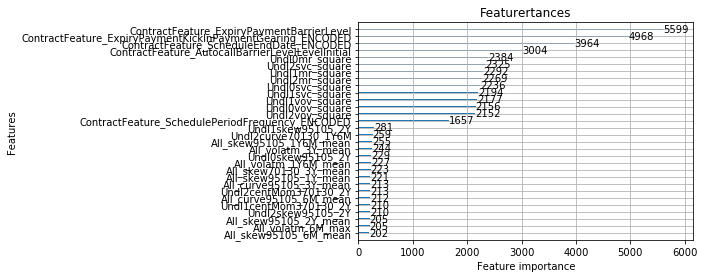

In [29]:
import matplotlib.pylab as plt

plt.figure(figsize=(100,100))
lgb.plot_importance(gbm, max_num_features=30)
plt.title("Featurertances")
plt.show()

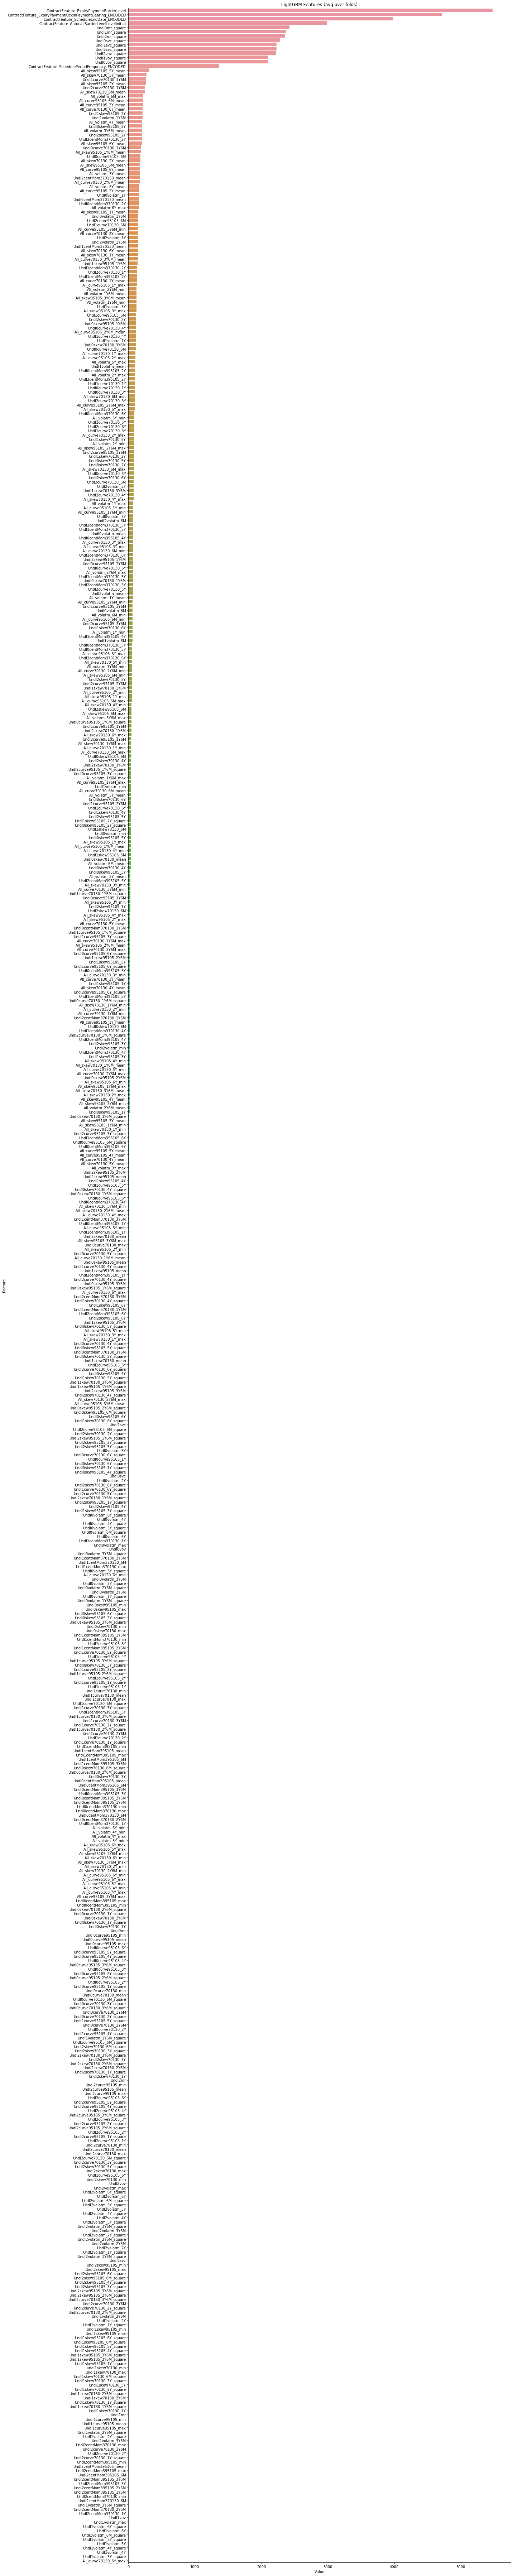

<Figure size 432x288 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(gbm.feature_importances_,X_train_df.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 100))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

In [27]:
feature_imp = pd.DataFrame(sorted(zip(gbm.feature_importances_,X_train_df.columns)), columns=['Value','Feature'])

In [28]:
feature_imp2 = feature_imp.drop(feature_imp[feature_imp['Value']<100].index)

In [31]:
best_fea = list(feature_imp2["Feature"])
len(best_fea)

83

In [30]:
for i in range(len(best_fea)):
    index = feature_imp[feature_imp['Feature'] == best_fea[i]].index
    print(best_fea[i],"---------------------", feature_imp.iloc[index[0],0])


All_volatm_5Y_max --------------------- 101
All_curve95105_2Y_max --------------------- 103
All_curve70130_1Y_max --------------------- 105
Undl0curve70130_6M --------------------- 109
Undl0skew70130_3Y6M --------------------- 109
Undl1volatm_1Y --------------------- 110
All_curve95105_2Y6M_mean --------------------- 111
Undl0curve70130_4Y --------------------- 111
Undl0skew95105_1Y6M --------------------- 111
Undl1curve70130_4Y --------------------- 111
Undl2skew70130_2Y --------------------- 112
Undl1curve95105_6M --------------------- 116
All_skew95105_3Y_max --------------------- 120
All_volatm_1Y6M_min --------------------- 121
Undl1volatm_3Y --------------------- 121
All_skew95105_3Y6M_mean --------------------- 122
All_volatm_1Y6M_mean --------------------- 122
All_volatm_2Y6M_min --------------------- 122
All_curve95105_1Y_max --------------------- 128
All_curve70130_1Y_mean --------------------- 129
Undl1centMom395105_2Y --------------------- 129
Undl2curve70130_1Y -----------

In [37]:
feature_imp3 = feature_imp.copy()

In [41]:
feature_imp3['value_percent'] = feature_imp3['Value']/sum(feature_imp3['Value'])
feature_imp3 = feature_imp3.sort_values(by="value_percent",ascending=False)
feature_imp3

,Value,Feature,value_percent
595,5477,ContractFeature_ExpiryPaymentBarrierLevel,0.092050
594,4712,ContractFeature_ExpiryPaymentKickInPaymentGear...,0.079193
593,3978,ContractFeature_ScheduleEndDate_ENCODED,0.066857
592,2986,ContractFeature_AutocallBarrierLevelLevelInitial,0.050185
591,2420,Undl0mr_square,0.040672
...,...,...,...
6,0,All_curve95105_6Y_max,0.000000
5,0,All_curve95105_5Y_max,0.000000
4,0,All_curve95105_4Y_min,0.000000
3,0,All_curve95105_4Y_max,0.000000


In [42]:
feature_imp3['cum'] = feature_imp3['value_percent'].cumsum()
feature_imp3

,Value,Feature,value_percent,cum
595,5477,ContractFeature_ExpiryPaymentBarrierLevel,0.092050,0.092050
594,4712,ContractFeature_ExpiryPaymentKickInPaymentGear...,0.079193,0.171244
593,3978,ContractFeature_ScheduleEndDate_ENCODED,0.066857,0.238101
592,2986,ContractFeature_AutocallBarrierLevelLevelInitial,0.050185,0.288286
591,2420,Undl0mr_square,0.040672,0.328958
...,...,...,...,...
6,0,All_curve95105_6Y_max,0.000000,1.000000
5,0,All_curve95105_5Y_max,0.000000,1.000000
4,0,All_curve95105_4Y_min,0.000000,1.000000
3,0,All_curve95105_4Y_max,0.000000,1.000000


In [45]:
for i in range(len(feature_imp3)):
    print(list(feature_imp3['Feature'])[i], "--------------",list(feature_imp3['cum'])[i])

ContractFeature_ExpiryPaymentBarrierLevel -------------- 0.09205042016806722
ContractFeature_ExpiryPaymentKickInPaymentGearing_ENCODED -------------- 0.1712436974789916
ContractFeature_ScheduleEndDate_ENCODED -------------- 0.23810084033613443
ContractFeature_AutocallBarrierLevelLevelInitial -------------- 0.28828571428571426
Undl0mr_square -------------- 0.3289579831932773
Undl1mr_square -------------- 0.36878991596638655
Undl2mr_square -------------- 0.40842016806722686
Undl0svc_square -------------- 0.4467899159663865
Undl1svc_square -------------- 0.4842857142857142
Undl2svc_square -------------- 0.5217310924369747
Undl2vov_square -------------- 0.5590420168067226
Undl1vov_square -------------- 0.5943865546218486
Undl0vov_square -------------- 0.6296302521008402
ContractFeature_SchedulePeriodFrequency_ENCODED -------------- 0.6524873949579831
All_skew95105_5Y_mean -------------- 0.6576974789915966
All_skew70130_3Y_mean -------------- 0.6622689075630251
Undl1curve70130_1Y6M --------

In [47]:
feature_imp3.to_csv("/home/jguo81/FordhamA/JiaGuo/model/test_feature_v1_1007.csv")